<a href="https://colab.research.google.com/github/rikudoayush/Jupyter_Notebooks/blob/master/ULMFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayushsri","key":"27e31aeb221b94b900d2e98dfa7e36a5"}'}

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [14]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 64 Mar 12 11:43 kaggle.json
{"username":"ayushsri","key":"27e31aeb221b94b900d2e98dfa7e36a5"}

In [15]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 5.3MB 6.4MB/s 
     |████████████████████████████████| 112kB 55.7MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 112kB 63.8MB/s 


In [16]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     348KB  2020-03-12 10:57:12          35327  
kimjihoo/coronavirusdataset                                 Coronavirus-Dataset                                  33KB  2020-03-11 16:52:48          10717  
imdevskp/ebola-outbreak-20142016-complete-dataset           Ebola 2014-2016 Outbreak Complete Dataset           101KB  2020-02-26 14:36:31            961  
paultimothymooney/repository-of-coronavirus-genomes         Repository of Coronavirus Genomes                    37MB  2020-03-03 02:01:34             45  
brunotly/foreign-exchange-rates-per-dollar-20002019         Fore

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [19]:
!pip install fastai

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [0]:
from fastai import *
from fastai.text import *
import re

In [26]:
data = pd.read_csv('/content/drive/My Drive/ULMfit/Tweets.csv')

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
# Keeping only the neccessary columns
data1 = data[['text','airline_sentiment']]

***First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset.***

In [0]:
# Splitting the dataset into train and test set
train, test = train_test_split(data1,test_size = 0.1)

**As a next step I separated the Positive, Negative, and Neutral tweets of the training set in order to easily visualize their contained words. After that I cleaned the text from hashtags, mentions and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive, Negative, and Neutral tweets.**

Positive words


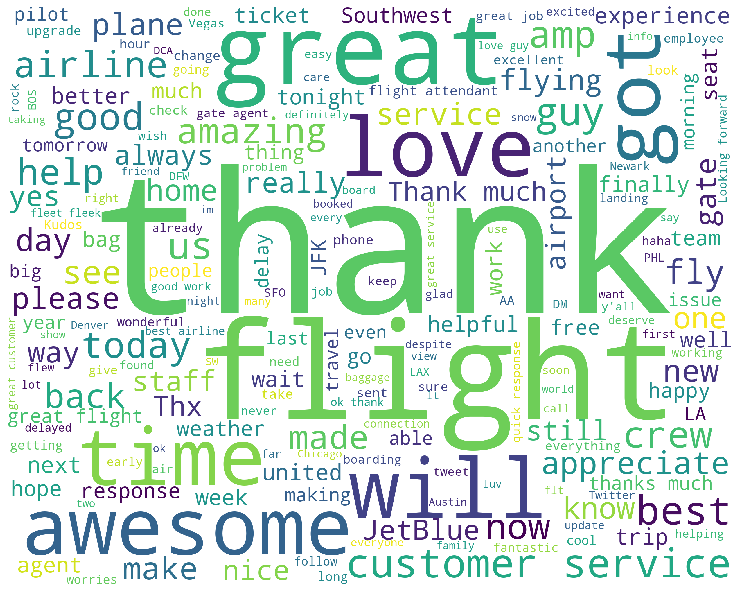

Negative words


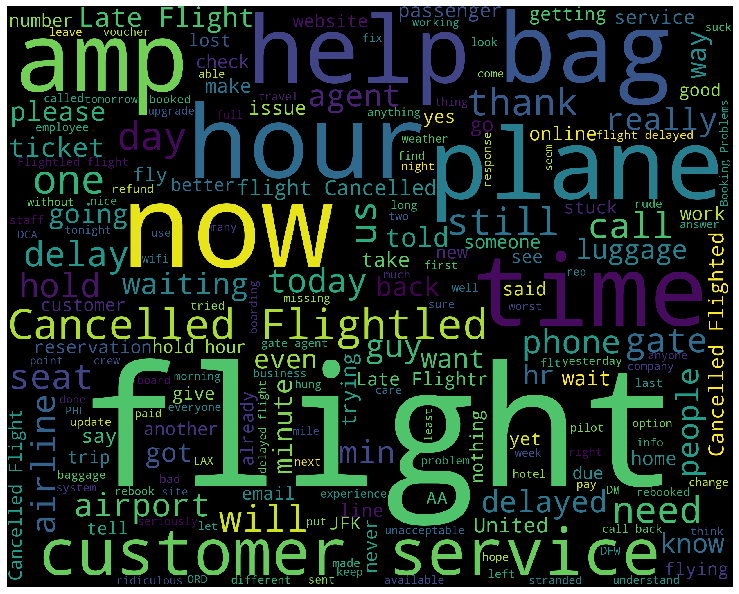

Neutral words


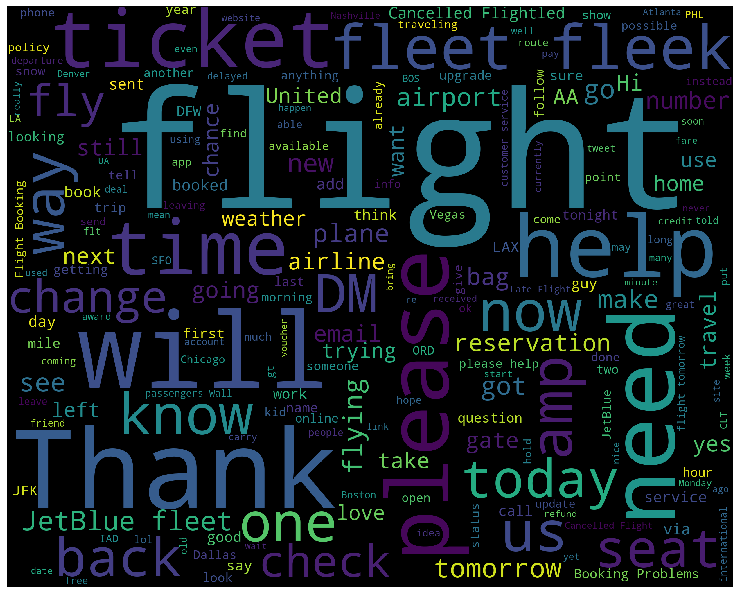

In [29]:
train_pos = train[ train['airline_sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = train[ train['airline_sentiment'] == 'negative']
train_neg = train_neg['text']
train_neu = train[ train['airline_sentiment'] == 'neutral']
train_neu = train_neu['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()



print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_neu)

***Interesting to notice the following words and expressions in the positive word set: thank, love, great, awesome, appreciate, best helping service.***

***In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.***

***At the same time, negative tweets contains words like: help, influence, delayed, never.***

***In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking***

#1.Motivation

***There are two particular transfer learning methods for this task because they are very similar in terms of how they use language modelling to perform unsupervised pre-training, followed by a supervised fine-tuning step (they are both semi-supervised methods). But they are also different in that they use different network architectures to achieve generalization. ULMFiT uses a 3-layer bi-LSTM architecture, while the OpenAI approach uses a transformer network.***




***transfer learning - a machine-learning technique that has the ability to transfer knowledge to novel scenarios not encountered during training. While transfer learning has been ubiquitous throughout computer vision applications since the advent of huge datasets such as ImageNet, it is only since 2017-18 that significant progress has been made for transfer learning in NLP applications. There have been a string of interesting papers in 2018 that discuss the power of language models in natural language understanding and how they can be used to provide pre-trained representations of a language's syntax, which can be far more useful when training a neural network for previously unseen tasks.***

***pre-trained word embedding techniques such as word2vec and GloVe, were heavily used in NLP to initialize the first layer of a neural network before training for a new task. These are shallow representations (a single layer of weights, known as embeddings). Any prior knowledge from the word embeddings are only present in the first layer of the network — the entire network would still need to be trained from scratch for a new target task.***

In [0]:
#Some of the characters in the training set are not utf-8 encoded, 
#hence we make sure that we only treat the characters that appear in the 
#English language for this task.

def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [32]:

# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

CPU
PyTorch version:  1.4.0


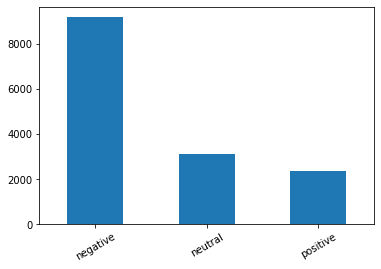

In [34]:
# Plot value counts for rach stance in the dataset
data1['airline_sentiment'].value_counts().plot.bar(rot=30);

**Apply the cleaning function to the 'Tweet' column of the training data**

In [35]:
data1['text'] = data1['text'].apply(clean_ascii)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
data1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


#2.Approach
This section describes the 3-Layer LSTM architecture used for transfer learning, ULMFit. This is the architecture described in the well known paper by Howard and Ruder, 2018, that has been proven to generalize well to unseen distributions. The goal is to see how ULMFit can perform in this particular Tweet stance classification task.

To classify out-of-domain data (such as our Twitter data), the following techniques are applied from the ULMFit paper:

Discriminative Fine-tuning
From the ULMFit paper, each layer of the model captures different types of information. Hence, it makes sense to fine-tune each layer differently, and this is done in ULMFit after extensive empirical testing and implementation updates. Rather than change each layer manually, we can use the implemented ratios, but adapt the multiplier that influences the learning rate for each layer.

ULMFit also uses discriminative fine-tuning with regard to the SGD update as follows:

$\theta_{t}^{l} = \theta_{t-1}^{l} - \eta^{l} \cdot \nabla_{\theta^l} J{\theta} $

##1-cycle learning rate policy
In the fine-tuning stage, a 1-cycle learning rate policy is applied, which comes from this report by Leslie Smith. It is a modification of the cyclical learning rate policy, which has been around for a long time, but the 1-cycle policy allows a large initial learning rate ($LR_{max}=10^{-3}$, for example), but decreases it by several orders of magnitude just at the last epoch. This seems to provide greater final accuracy. In the ULMFit implementation, this 1-cycle policy has been tweaked and is referred to as slanted triangular learning rate.

Gradual unfreezing
Rather than training all the layers at once during classification, the layers are "frozen" and the last layer is fine-tuned first, followed by the next layer before it, and so on. This avoids the phenomenon known as catastrophic forgetting (by fine-tuning all layers too aggressively).

Concatenated pooling
Because an input text can consist of hundreds or thousands of words, information might get lost if we only consider the last hidden state.

Hence, the hidden state at the last time step, $h_T$ is concatenated with both the max-pooled and mean-pooled representation of the hidden states over as many time steps as can fit in GPU memory.

$h_C = [h_T, maxpool(H), meanpool(H)]$

Where $H$ is the vector of all hidden states.

##3-stage fine-tuning methodology
The classification task is done in a 3-stage process:

General-domain LM pretraining: ULMFit has a pretrained model generated using an AWD-LSTM (as per Merity et al., 2017)) to develop a language model called Wikitext-103 and was trained of 28,595 preprocessed Wikipedia articles, totalling to 103 million words.
Target task LM fine-tuning: Since the data for the target will likely come from a different distribution, ULMFit allows us to use the pre-trained language model anf fine-tune it (using the above techniques) to adapt to the idiosyncrasies of the target data.
Target task classifier fine-tuning: Once we save the updated weights from the language model fine-tuning step, we can fine-tune the classifier with gradual unfreezing and the other techniques described above to perform task-specific class prediction.
Note that for this SemEval Tweet stance classification task, we only perform steps 2 and 3, and utilize the pretrained language model from the fastai database. 

***Store the relevant information from training data***
***ULMFit requires just the sentiment and the text data (i.e. tweets) for the ***
***language-model finetuning and classification steps, hence these are stored in a DataFrame***. 

In [38]:
train1 = pd.concat([data['airline_sentiment'], data['text']], axis=1)
train1.tail()

,airline_sentiment,text
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know h...


In [39]:
data1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


***Any of the above method can be used to store data for training and testing***

In [0]:
train1.to_csv('/content/drive/My Drive/ULMfit/train.csv', index=False, header=False)

#4.Action

Stance detection uses a semi-supervised approach where we reuse weights from a pretrained language model (in this case wikitext-103) and perform multi-class classification on the training data over the three classes (POSITIVE, NEGATIVE and NEUTRAL).

Evaluation
The metric used to score the sentiment classification is F-score. The event organizers provide an evaluation script that calculates the macro-average of F-score (FAVOR) and F-score (AGAINST) for task A. This compares our model's predicted sentiment for each Tweet against the gold reference.



#5. Transfer Learning Stages
This notebook utilizes the refactored and updated version (v1) of ULMFit as implemented in the fastai GitHub repository. This requires an install of Pytorch 1.0.0 (released on December 7, 2018) to run since its development intended to move alongside PyTorch's own development cycle in the future. It is recommended to run this entire notebook in a virtual environment to avoid clashes with pre-existing installs of PyTorch.

The refactored code for ULMFit is much more high-level and abstracted than the original version that was used in the paper, so it doesn't make sense to rewrite the data manipulation code for text handling and tokenization from the ground up. We can take advantage of the powerful transfer learning functionality that is baked into ULMFit (obtained after months of fine-tuning and refactoring the source code by Fast.ai) instead!

##5.1 Language model finetuning: (SemEval Tweets only)
The pre-trained language model used is from this work by Merity et al.. Although we are working with Twitter whose content's structure that can be quite dissimilar to Wikipedia's sentence formulation, the hope is that the language understanding developed by the model, in combination with the fine-tuning techniques described in Howard and Ruder's paper, will allow us to at least transfer some knowledge for the purposes of classification of Tweet stance.

Preprocess data for language model fine-tuning

In [0]:
path = '/content/drive/My Drive/ULMfit'

In [44]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', min_freq=1)

***Note that in this case, we specify a minimum word frequency of 1 (i.e. words that appear just once in the data are given the tag <unk> during tokenization.***

In [0]:
# Save the language and classifier model data for re-use
data_lm.save()

In [46]:
data_lm.show_batch()

idx,text
0,", just sent :) xxbos @jetblue flight from xxup dca to xxup bos has no heat # ohno # bundleup # xxmaj leastthebeverageswillbecold xxbos @southwestair xxmaj cancelled xxmaj flighting flights 45 minutes before takeoff & & sitting for 45 min on the runway of the rescheduled flight # badservice xxbos xxmaj aww , is it ? @jetblue i guess now i need to book a flight to somewhere warm xxup"
1,"turns 30 . # unitedsucksdick xxbos @americanair would have been had i seen this before 1130pm xxup est , when i was sound asleep . xxbos @americanair i 'd like to apologize to the gate agent for flight xxup aa76 , i was not aware that zone 1 was after the nine other precious gems . xxbos @americanair flights have been on time xxmaj late xxmaj flightly though ! xxbos"
2,": / / t.co / e1mex0t6q5 xxbos @united thanks for ruining my wedding anniversary . xxmaj flight xxup ua4904 from xxup ewr to xxup rdu is delayed by over 3 hours and will reach home the nxt day xxbos @americanair every time i try to call , it tells me to try again xxmaj late xxmaj flightr and just hangs up . xxbos @united xxmaj flight 6212 ... massive fail"
3,"me after lying , raising their voice . xxmaj with no explanation on what happened http : / / t.co / 31cfhtk60r xxbos @usairways could n't be more thankful to your # orf and # dca crews on the ground and in the air today for help with a sick kid and a lost bag ! xxbos @usairways - been on hold for more than 2.5 hours - this after"
4,"i am on right now , but i sincerely miss you . # bestairline xxbos @united \n xxmaj you really know how to piss people off . xxmaj your xxmaj farelock option is fake ! xxbos @southwestair ok xxrep 5 a y xxup ugh xxup im 8 xxup min xxup away xxbos @americanair i 'm sure all these birds will be in warmer weather soon . xxbos @jetblue is"


We only need to run the above tokenization step once, and save the data. All the data goes to a local folder named tmp/. For a large added vocabulary, the above tokenization step can take a while, hence we save them and restart the notebook from the next cell (if we close our session).

The tokenization technique used by fastai.text is quite advanced, and uses quite a few tricks to capture semantic meaning from the text. Unlike typical NLTK-type tokenization, here we are not converting the Tweets to lowercase and removing information from the base text - that would result in a tremendous loss of information that our model could use to gather an understanding of our new task's vocabulary.

Instead, a number of added tokens are applied so that minimal information is lost. A full list of all the tokenization rules used are here.

As an example, the xxmaj token [source] indicates that there is capitalization of the word, either in part or in full. "The" will be tokenized as "xxmaj the". For words that are full capitalized, such as "I AM SHOUTING"; it is tokenized as "xxup i xxup am xxup shouting". The tokenizer uses spaCy's underlying tokens, but adds tags in a very smart way that balances capturing semantic meaning while reducing the number of overall tokens, so it is both powerful and efficient.

The tokenization process described above is highly efficient, in part thanks to the power of SpaCy and also due to the multi-threading wrappers implemented by Fast.ai on top of Spacy's tokenizer. As a result, a really large language model's vocabulary (of millions of words) can also be effectively tokenized in a reasonable time.

##Define learner object for language model finetuning
We define a learner object that uses the tokenized language model data, that is organized into batches for the GPU, and feed it a pre-trained language model.

We use the wt_103_v1 model that was refined after re-training using the more efficient fastai v1 library. The data (lstm_wt103.pth) is downloaded through an AWS-hosted link (accessed through the fastai.datasets interface), and stored locally. All the data in the language model file is numericalized and stored in a way that the learner can efficiently pick up tokens in float form. In addition to the language model, there is also an additional pickle object itos_wt103.pkl that is similar to the torchtext definition of "integer-to-string" - this contains the list of unique tokens in word form, so that we can map the tokens back to strings if necessary.

In [48]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.7)

##Print the structure of the language model RNN
We can examine the architecture of the 3-layer LSTM used in ULMFit as shown below. For the language model fine-tuning, we define the embeddings based on the the target task vocabulary size. A single linear output layer is defined that updates the weights once we pass the input through the network.

In [49]:
list(learn.model.children())

[AWD_LSTM(
   (encoder): Embedding(14016, 400, padding_idx=1)
   (encoder_dp): EmbeddingDropout(
     (emb): Embedding(14016, 400, padding_idx=1)
   )
   (rnns): ModuleList(
     (0): WeightDropout(
       (module): LSTM(400, 1152, batch_first=True)
     )
     (1): WeightDropout(
       (module): LSTM(1152, 1152, batch_first=True)
     )
     (2): WeightDropout(
       (module): LSTM(1152, 400, batch_first=True)
     )
   )
   (input_dp): RNNDropout()
   (hidden_dps): ModuleList(
     (0): RNNDropout()
     (1): RNNDropout()
     (2): RNNDropout()
   )
 ), LinearDecoder(
   (decoder): Linear(in_features=400, out_features=14016, bias=True)
   (output_dp): RNNDropout()
 )]

##Find the optimum learning rate
fastai.train source provides a convenient utility to search through a range of learning rates to find the optimum one for our dataset.

The idea is that our optimization function needs to use a learning rate that is an order of magnitude below the point at which the loss starts to diverge. We can quickly find this as shown below.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


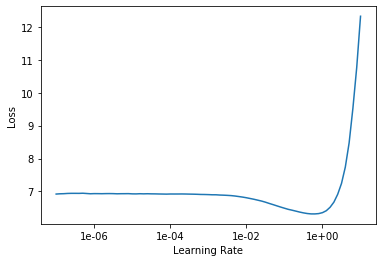

In [50]:
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot()

##Run the language_model_learner class
The pre-trained language model quickly downloads from the fastai's AWS link, so there is no need to download it separately. [drop_mult] is the multiplier applied to the dropout in the language learner. As per the ULMFit paper, we use a custom dropout for each language model layer, and the drop_multjust scales a numpy array of these dropouts which remain in the same relative ratio to one another. These numbers have been obtained through empirical tuning for a range of language tasks, and we took note of this during our extensive reading on this task.

In [52]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)
learn.fit_one_cycle(cyc_len=1, max_lr=1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.366837,5.820768,0.167923,13:50


##Unfreeze the entire model¶
To train the language model during fine-tuning, we unfreeze all the layers and then perform training for a reasonable time until we obtain a low enough validation loss. For a larger target vocabulary, these hyperparameters might need to be modified, and teh training time would be significantly longer, but for this SemEval task, we have a very small additional vocabulary to fine-tune the language model on, so it is really quick.

In [53]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=20, max_lr=1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.532880,5.007190,0.202193,15:43
1,5.134223,4.596095,0.232038,16:01
2,4.704305,4.306462,0.251300,16:04
3,4.407062,4.154894,0.264693,15:59
4,4.162639,4.048105,0.276090,15:57
5,3.953809,3.987687,0.284112,15:55
6,3.771182,3.965352,0.285754,15:52
7,3.582647,3.967858,0.287763,15:49
8,3.419939,3.979650,0.289102,16:09
9,3.280406,4.005100,0.288813,15:46


In [0]:
# Save the fine-tuned encoder
learn.save_encoder('ft_enc')

##5.2 Train the Classifier: All Tweets at once
For classification, the winning paper for the SemEval 2016 task (team MITRE) describe in section $5$ of their paper that they achieved their highest average F1 score when they trained 5 distinct classifiers, i.e. a separate training task for each of the 5 topics in the training data.

But, we will try to perform classification for all topics at one time. Evaluation of the predicted classes is also done on a topic basis.

For classification, the TextClasDataBunch [source] dataloader used is slightly different. Just like the language model custom data loader described in the previous section, it does a lot under the hood. The classification data loader tokenizes the training data, but batchifies the data differently from the language model data loader - for classification, we perform sorting so as to group all large sentences together, and smaller sentences together - and pad them to have all batches of roughly the same length, followed by randomizing these batches so that we don't introduce additional bias during training.

Just like before, we define the learner object used for classification. Note that we feed in the entire vocabulary of the training data to the classifier. We once more specify a minimum word frequency of 1 (i.e. words that appear just once in the data are given the tag <unk>.

In [55]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab,
                                       min_freq=1, bs=32)
data_clas.save()

In [0]:
learn = text_classifier_learner(data_clas, arch = AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.freeze()


Note that we begin the training with all the outer layers as frozen. The fine-tuned language model is read in, and we use a dropout multiplier as shown above.

For training the classifier, we apply "gradual unfreezing", to avoid "catastrophic forgetting" as explained in section $3.3$ of Howard and Ruder's paper. In addition to gradual unfreezing,

**Just as before, find optimum learning rate for the classifier**

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


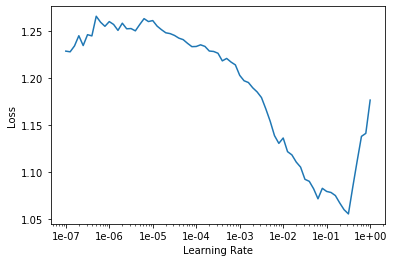

In [58]:
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot()

##Carefully train the classifier
During classification, we gradually unfreeze layers as shown below. This helps us obtain a better classification accuracy than if we were to aggressively train all the layers at once

In [59]:
learn.fit_one_cycle(cyc_len=1, max_lr=1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.773202,0.593611,0.776639,14:56


In [60]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-4,1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.663393,0.503015,0.801230,16:08


In [61]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-5,5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.592390,0.480746,0.807377,16:36


In [62]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.483591,0.453534,0.819331,17:29
1,0.486183,0.453255,0.817623,18:24
2,0.454726,0.451944,0.818989,17:36
3,0.437236,0.450440,0.823429,18:19


##Cross-tabulate the predictions for each class
The below table shows the predicted classes for the sentiments in concern. The actual evaluation of the F1 score of the classification result is done at a later step.

In [63]:
# get predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis=1)
pd.crosstab(predictions, targets)

col_0,0,1,2
row_0,,,
0,1694,205,72
1,97,382,39
2,53,51,335



Evaluate the predicted results from the classifier
We read in the test dataset and store in a Pandas DataFrame as shown.

In [0]:
test1=test.copy()

In [0]:
del test1['airline_sentiment']

In [78]:
test1.head()

,text
7535,@JetBlue they were amazing and thank you!
6394,@SouthwestAir - total win!! Happy 7th bday on ...
4737,@SouthwestAir to start 2xdaily #B737-700 fligh...
11188,@USAirways will these prices be honored? Ive w...
3839,@united Flew ORD to Miami and back and had gr...


In [64]:
test.head()

,text,airline_sentiment
7535,@JetBlue they were amazing and thank you!,positive
6394,@SouthwestAir - total win!! Happy 7th bday on ...,positive
4737,@SouthwestAir to start 2xdaily #B737-700 fligh...,neutral
11188,@USAirways will these prices be honored? Ive w...,negative
3839,@united Flew ORD to Miami and back and had gr...,positive


***Apply the learner's predict method to produce our prediction***

In [0]:
test1['airline_sentiment'] = test1['text'].apply(lambda row: str(learn.predict(row)[0]))

In [80]:
test1.tail()

,text,airline_sentiment
6963,@JetBlue everyone is overreacting. Keep up you...,positive
7551,@JetBlue they are now being sent off the plane...,negative
9905,@USAirways But good luck getting there! Not cool.,negative
1585,@united UA1565 IAH -&gt; SJO is delayed by lik...,negative
12978,@AmericanAir from the rude ticket counter empl...,negative


In [0]:
test1.to_csv('/content/drive/My Drive/ULMfit/predicted.csv', sep='\t', index=True,
                 header=['text', 'airline_sentiment'])